In [2]:
import numpy as np
import matplotlib.pyplot as plt


# 瑞丽差分隐私 RDP
对于所有临近的数据集，$(\alpha,\epsilon)-RDP$ 定义为：
$$
D_{\alpha} (F(x)\Vert F(x')) \leq \epsilon
$$

其中 $\alpha$ 是瑞丽散度的阶数（必须大于等于 1），$\epsilon$ 是参数，即隐私预算。 $D_{\alpha}(P\Vert Q)$ 是两个分布 $P, Q$ 的 $\alpha$ 阶瑞丽散度，定义为：
$$
D_{\alpha}(P\Vert Q) = \frac{1}{\alpha-1}\log \mathbb{E}_{x\sim Q}\left(\frac{P(x)}{Q(x)}\right)^\alpha
$$

当 $\alpha\to\infty$ 时，就是原始的 $\epsilon$-DP。

## Laplace 机制
隐私预算的计算公式可以参见原论文中的 Table 1.

In [3]:
def LaplaceMechanismForRDP(order, scale):
    """Privacy budgets of Laplace mechanism of RDP with sensitivity 1

    Args:
        order (int): The param `alpha` in Rényi Divergence
        scale (int): Noise scale in Laplace mechanism
        
    Returns:
        epsilon (float): The privacy budgets `epsilon` given order and scale
    """
    if order < 0:
        raise ValueError('Order must be greater than or equal to 1.')
    
    if order == 1:
        tmp1 = 1 / scale
        tmp2 = np.exp(-1 / scale) - 1
        return tmp1 + tmp2
    else:
        tmp1 = 1 / (order - 1)
        tmp2 = (order / (2 * order - 1)) * np.exp((order - 1) / scale)
        tmp3 = ((order - 1) / (2 * order - 1)) * np.exp(-order / scale)
        return tmp1 * np.log(tmp2 + tmp3)
    

## Gause 机制
隐私预算的计算公式可以参见原论文中的 Table 1.

In [4]:
def GauseMechanismForRDP(order, scale):
    """Privacy budgets of Gause mechanism of RDP with sensitivity 1

    Args:
        order (int): The param `alpha` in Rényi Divergence
        scale (int): Noise scale in Laplace mechanism
        
    Returns:
        epsilon (float): The privacy budgets `epsilon` given order and scale
    """
    return order / (2 * scale ** 2)

# Wasserstein 差分隐私 WDP
对于所有临近的数据集 $D, D'$，$(\mu, \epsilon)$-WDP 定义为：
$$
W_{\mu}(Pr(\mathcal{M}(D)\in S), Pr(\mathcal{M}(D')\in S)) = 
\left(
    \inf_{\gamma\in\Gamma(Pr(\mathcal{M}(D), Pr(\mathcal{M}(D'))}\int_{\mathcal{X}\times\mathcal{Y}}\rho(x,y)^\mu d\gamma(x,y)
\right)^{\frac{1}{\mu}}\leq \epsilon
$$

其中 $\mu$ 是 Wasserstein 距离的阶数，$\epsilon$ 是参数，即隐私预算。
$$

## Laplace 机制
隐私预算的计算公式可以参见原论文中的 Table 1.

In [5]:
def LaplaceMechanismForWDP(order, scale):
    """Privacy budgets of Laplace mechanism of WDP with sensitivity 1 (the sensitivity `\Delta_p f` can
    be an arbitrary positive constant, so set to 1).

    Args:
        order (int): The param `mu` in Wasserstein distance
        scale (int): Noise scale in Laplace mechanism
        
    Returns:
        epsilon (float): The privacy budgets `epsilon` given order and scale
    """
    return (1 / 2) * ((np.sqrt(2 * (1 / scale + np.exp(-1 / scale) - 1))) ** (1 / order))

## Gause 机制
隐私预算的计算公式可以参见原论文中的 Table 1.

In [16]:
def GauseMechanismForWDP(order, scale):
    """Privacy budgets of Laplace mechanism of WDP with sensitivity 1 (the sensitivity `\Delta_p f` can
    be an arbitrary positive constant, so set to 1).

    Args:
        order (int): The param `mu` in Wasserstein distance
        scale (int): Noise scale in Laplace mechanism
        
    Returns:
        epsilon (float): The privacy budgets `epsilon` given order and scale
    """
    return (1 / 2) * ((1 / scale) ** (1 / order))

# 实验 1
实验 1 的目的是检验 WDP 的高斯性质和拉普拉斯性质，观测的是 RDP 和 WDP 的隐私预算 $\epsilon$。

具体来说，对于 RDP 和 WDP，将拉普拉斯噪声和高斯噪声的尺度 (scale) 分别设置为 $1, 2, 3, 5, 10$，并允许 RDP 的阶数 $\alpha$ 和 WDP 的阶段 $\mu$ 在 $1$ 到 $10$ 之间变化，观测隐私预算随着两个阶段的变化规律。隐私预算越大，表示两个相邻数据集问询输出的值的分布的差异就越大，隐私性越弱（两个相邻数据集只有一条数据不同，问询的结果差异越大，就越有可能从这种差异中获取到该条数据的信息，隐私性越弱）。

从实验结果可以看出：对于 WDP，不论是 Laplace 机制还是 Gause 机制，其隐私预算 $\epsilon$ 和阶数 $\mu$ 无关，而 RDP 则有关，特别是 Gause 机制情况下。因此，使用 RDP 需要慎重的选择阶数 $\alpha$，而 WDP 则不需要考虑这个问题。

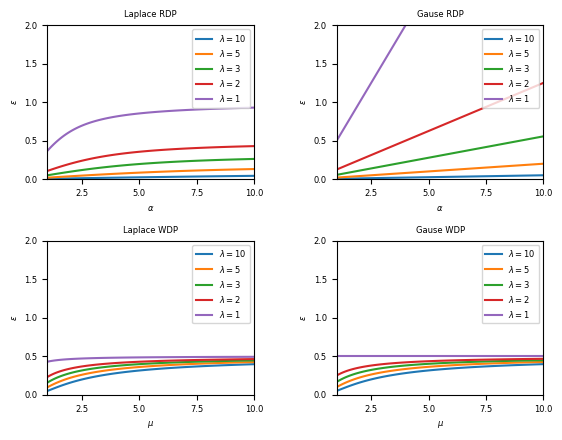

In [20]:
# 1. 初始化两种 DP 的阶数
order = np.linspace(start = 1, stop = 10, num = 100, endpoint = True)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

# 2. Laplace 机制下的 RDP
plt.subplot(2, 2, 1)
plt.plot(order, [LaplaceMechanismForRDP(i, 10) for i in order], label = '$\lambda = 10$')
plt.plot(order, [LaplaceMechanismForRDP(i, 5) for i in order], label = '$\lambda = 5$')
plt.plot(order, [LaplaceMechanismForRDP(i, 3) for i in order], label = '$\lambda = 3$')
plt.plot(order, [LaplaceMechanismForRDP(i, 2) for i in order], label = '$\lambda = 2$')
plt.plot(order, [LaplaceMechanismForRDP(i, 1) for i in order], label = '$\lambda = 1$')
plt.xlim(left=1, right=10)
plt.ylim(bottom=0, top=2)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlabel(r'$\alpha$', fontsize=6)
plt.ylabel('$\epsilon$', fontsize=6)
plt.legend(fontsize=6, loc = 1)
plt.title("Laplace RDP", fontsize=6)

# 3. Gause 机制下的 RDP
plt.subplot(2, 2, 2)
plt.plot(order, [GauseMechanismForRDP(i, 10) for i in order], label = '$\lambda = 10$')
plt.plot(order, [GauseMechanismForRDP(i, 5) for i in order], label = '$\lambda = 5$')
plt.plot(order, [GauseMechanismForRDP(i, 3) for i in order], label = '$\lambda = 3$')
plt.plot(order, [GauseMechanismForRDP(i, 2) for i in order], label = '$\lambda = 2$')
plt.plot(order, [GauseMechanismForRDP(i, 1) for i in order], label = '$\lambda = 1$')
plt.xlim(left=1, right=10)
plt.ylim(bottom=0, top=2)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlabel(r'$\alpha$', fontsize=6)
plt.ylabel('$\epsilon$', fontsize=6)
plt.legend(fontsize=6, loc = 1)
plt.title("Gause RDP", fontsize=6)

# 4. Laplace 机制下的 WDP
plt.subplot(2, 2, 3)
plt.plot(order, [LaplaceMechanismForWDP(i, 10) for i in order], label = '$\lambda = 10$')
plt.plot(order, [LaplaceMechanismForWDP(i, 5) for i in order], label = '$\lambda = 5$')
plt.plot(order, [LaplaceMechanismForWDP(i, 3) for i in order], label = '$\lambda = 3$')
plt.plot(order, [LaplaceMechanismForWDP(i, 2) for i in order], label = '$\lambda = 2$')
plt.plot(order, [LaplaceMechanismForWDP(i, 1) for i in order], label = '$\lambda = 1$')
plt.xlim(left=1, right=10)
plt.ylim(bottom=0, top=2)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlabel(r'$\mu$', fontsize=6)
plt.ylabel('$\epsilon$', fontsize=6)
plt.legend(fontsize=6, loc = 1)
plt.title("Laplace WDP", fontsize=6)

# 5. Gause 机制下的 WDP
plt.subplot(2, 2, 4)
plt.plot(order, [GauseMechanismForWDP(i, 10) for i in order], label = '$\lambda = 10$')
plt.plot(order, [GauseMechanismForWDP(i, 5) for i in order], label = '$\lambda = 5$')
plt.plot(order, [GauseMechanismForWDP(i, 3) for i in order], label = '$\lambda = 3$')
plt.plot(order, [GauseMechanismForWDP(i, 2) for i in order], label = '$\lambda = 2$')
plt.plot(order, [GauseMechanismForWDP(i, 1) for i in order], label = '$\lambda = 1$')
plt.xlim(left=1, right=10)
plt.ylim(bottom=0, top=2)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlabel(r'$\mu$', fontsize=6)
plt.ylabel('$\epsilon$', fontsize=6)
plt.legend(fontsize=6, loc = 1)
plt.title("Gause WDP", fontsize=6)

plt.show()

